In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Functions

In [2]:
# inspect df
def inspect_dataframe(df):
    """
    Function to perform basic inspection on a DataFrame: 
    shape, column names, data types, and missing values.
    
    """

    print('Check the shape (rows, columns):')
    print(df.shape)

    print('\nColumn names:')
    print(df.columns)


    print('\nData types:')
    print(df.dtypes)


    print('\nMissing values:')
    print(df.isnull().sum())

# clean column names
def clean_column_names(df):
    """
    Function to clean the column names of a DataFrame:
    - Convert to lowercase
    - Replace spaces with underscores
    - Remove or replace special characters with underscores

    """

    def clean_name(name):
        name = name.lower()
        name = name.replace(" ", "_")
        name = re.sub(r'[^a-z0-9_]', '_', name)
        return name
    
    df.columns = [clean_name(col) for col in df.columns]    
    return df

# check unique and empty values
def check_unique_and_empty(df):
    result = []
    
    for column in df.columns:
        unique_values = df[column].dropna().unique()
        empty_values = df[column].isna().sum()
        
        result.append({
            'Column': column,
            'Unique value count': len(unique_values),  # Number of unique values in the column
            'Empty value count': empty_values
        })
    
    result_df = pd.DataFrame(result)
    result_df.set_index('Column', inplace=True)
    
    print('Summary of Unique and Empty Values:\n')
    print(result_df)
    print('\n' + '-'*50 + '\n')

# convert floats to ints
def floats_to_ints(df, column_name):
    """
    Convert float values in the specified column to integers, leaving NaNs intact.
   
    """
    # apply floor() when needed, leave NaN values as they are
    df[column_name] = df[column_name].apply(lambda x: np.floor(x) if pd.notna(x) else x)
    df[column_name] = df[column_name].apply(lambda x: int(x) if pd.notna(x) else x)
    df[column_name] = df[column_name].astype('Int64')  # Use 'Int64' for nullable integers in pandas
    return df

## Read and clean data

# Final Demo DF

In [3]:
final_demo_df = pd.read_csv('../../data/raw/df_final_demo.txt')
final_demo_df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [4]:
# clean column names
clean_column_names(final_demo_df)

# inspect dataframe
inspect_dataframe(final_demo_df)

Check the shape (rows, columns):
(70609, 9)

Column names:
Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

Data types:
client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

Missing values:
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64


In [5]:
# change column names for standardization
new_column_names_final_demo_df = {
    'client_id': 'client_id',
    'clnt_tenure_yr': 'client_tenure_years',
    'clnt_tenure_mnth': 'client_tenure_months',
    'clnt_age': 'client_age',
    'gendr': 'gender',
    'num_accts': 'num_accounts',
    'bal': 'balance',
    'calls_6_mnth': 'calls_last_6_months',
    'logons_6_mnth': 'logons_last_6_months'
}

final_demo_df.rename(columns=new_column_names_final_demo_df, inplace=True)

In [6]:
# check unique values
check_unique_and_empty(final_demo_df)

Summary of Unique and Empty Values:

                      Unique value count  Empty value count
Column                                                     
client_id                          70609                  0
client_tenure_years                   54                 14
client_tenure_months                 482                 14
client_age                           165                 15
gender                                 4                 14
num_accounts                           8                 14
balance                            70328                 14
calls_last_6_months                    8                 14
logons_last_6_months                   9                 14

--------------------------------------------------



In [7]:
final_demo_df.head()

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logons_last_6_months
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [8]:
# handle unique values in 'gender' column
print(final_demo_df['gender'].unique())

replacement_dict_gender = {
    'U': 'Unspecified',
    'M': 'Male',
    'F': 'Female',
    'X': 'Unspecified',
    np.nan: 'Unspecified'
}

# Apply the function to replace the gender values
final_demo_df['gender'] = final_demo_df['gender'].replace(replacement_dict_gender)

['U' 'M' 'F' nan 'X']


In [9]:
# convert floats to ints in several columns
floats_to_ints(final_demo_df, 'client_tenure_years')
floats_to_ints(final_demo_df, 'client_tenure_months')
floats_to_ints(final_demo_df, 'num_accounts')
floats_to_ints(final_demo_df, 'calls_last_6_months')
floats_to_ints(final_demo_df, 'logons_last_6_months')
floats_to_ints(final_demo_df, 'client_age')
check_unique_and_empty(final_demo_df)

Summary of Unique and Empty Values:

                      Unique value count  Empty value count
Column                                                     
client_id                          70609                  0
client_tenure_years                   54                 14
client_tenure_months                 482                 14
client_age                            84                 15
gender                                 3                  0
num_accounts                           8                 14
balance                            70328                 14
calls_last_6_months                    8                 14
logons_last_6_months                   9                 14

--------------------------------------------------



In [10]:
# drop empty values
final_demo_df = final_demo_df.dropna()
# check_unique_and_empty(final_demo_df)

# initial rows: 70609, rows after dropping empty values: 70594

final_demo_df.head()

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logons_last_6_months
0,836976,6,73,60,Unspecified,2,45105.30,6,9
1,2304905,7,94,58,Unspecified,2,110860.30,6,9
2,1439522,5,64,32,Unspecified,2,52467.79,6,9
3,1562045,16,198,49,Male,2,67454.65,3,6
4,5126305,12,145,33,Female,2,103671.75,0,3


In [11]:
# generate clean csv file
final_demo_df.to_csv('final_demo_df_clean.csv', index=False)

# Final Experiment Clients DF

In [12]:
final_experiment_clients_df = pd.read_csv('../../data/raw/df_final_experiment_clients.txt')
final_experiment_clients_df.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [13]:
# clean column names
clean_column_names(final_experiment_clients_df)

# inspect df
inspect_dataframe(final_experiment_clients_df)

Check the shape (rows, columns):
(70609, 2)

Column names:
Index(['client_id', 'variation'], dtype='object')

Data types:
client_id     int64
variation    object
dtype: object

Missing values:
client_id        0
variation    20109
dtype: int64


In [14]:
# check unique values
check_unique_and_empty(final_experiment_clients_df)

Summary of Unique and Empty Values:

           Unique value count  Empty value count
Column                                          
client_id               70609                  0
variation                   2              20109

--------------------------------------------------



### Variation Count

In [15]:
variation_percentages = final_experiment_clients_df['variation'].value_counts(normalize=True) * 100

print(variation_percentages)

variation
Test       53.40198
Control    46.59802
Name: proportion, dtype: float64


/tmp/ipykernel_44129/3023843832.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variation_counts.index, y=variation_counts.values, palette=colors)


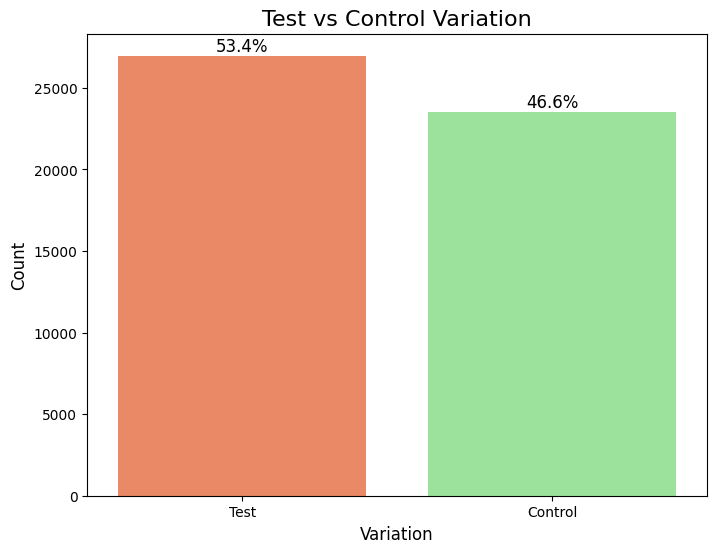

In [16]:
variation_counts = final_experiment_clients_df['variation'].value_counts()

variation_percentages = variation_counts / variation_counts.sum() * 100

colors = ['coral', 'lightgreen']

plt.figure(figsize=(8, 6))
sns.barplot(x=variation_counts.index, y=variation_counts.values, palette=colors)

plt.title('Test vs Control Variation', fontsize=16)
plt.xlabel('Variation', fontsize=12)
plt.ylabel('Count', fontsize=12)

# annotate each bar with the percentage
for i, p in enumerate(plt.gca().patches):
    height = p.get_height()
    # add annotation with the percentage on top of each bar
    plt.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{variation_percentages.iloc[i]:.1f}%', 
             ha='center', va='bottom', fontsize=12, color='black')

plt.show()

## Questions:

1. Primary clients using the online process
2. Are the primary clients younger or older?
3. Are the primary clients newer or long-standing?

In [17]:
# clients using the online process (logons_last_6_months > 5)
primary_clients = final_demo_df[final_demo_df['logons_last_6_months'] > 5]

# We can compare the average age of primary clients vs. the full dataset
avg_age_all_clients = round(final_demo_df['client_age'].mean())
avg_age_primary_clients = round(primary_clients['client_age'].mean())


# We can compare the average tenure in years of primary clients vs. the full dataset
avg_tenure_all_clients = round(final_demo_df['client_tenure_years'].mean())
avg_tenure_primary_clients = round(primary_clients['client_tenure_years'].mean())

# Output the results
print(f'Primary clients:\n{primary_clients[['client_id', 'client_age', 'client_tenure_years', 'logons_last_6_months']]}\n')
print(f'Average age of all clients: {avg_age_all_clients}')
print(f'Average age of primary clients: {avg_age_primary_clients}')
print(f'Are primary clients younger or older? {'Younger' if avg_age_primary_clients < avg_age_all_clients else 'Older'}\n')
print(f'Average tenure of all clients: {avg_tenure_all_clients}')
print(f'Average tenure of primary clients: {avg_tenure_primary_clients}')
print(f'Are primary clients newer or long-standing? {'Newer' if avg_tenure_primary_clients < avg_tenure_all_clients else 'Long-standing'}')

Primary clients:
       client_id  client_age  client_tenure_years  logons_last_6_months
0         836976          60                    6                     9
1        2304905          58                    7                     9
2        1439522          32                    5                     9
3        1562045          49                   16                     6
8         285619          67                   30                     6
...          ...         ...                  ...                   ...
70590    2721884          53                   15                     6
70592    4277747          40                   12                     6
70593    7217125          58                   14                     6
70605    8981690          31                   12                     6
70608    5602139          59                   21                     7

[34930 rows x 4 columns]

Average age of all clients: 46
Average age of primary clients: 47
Are primary clients younge